In [31]:
from numpy import unique, argmax
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [32]:
#Loading mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
#reshape & test the dataset
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [33]:
#normalizing the pixels
#commented out when acquiring without normalizing accuracy
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

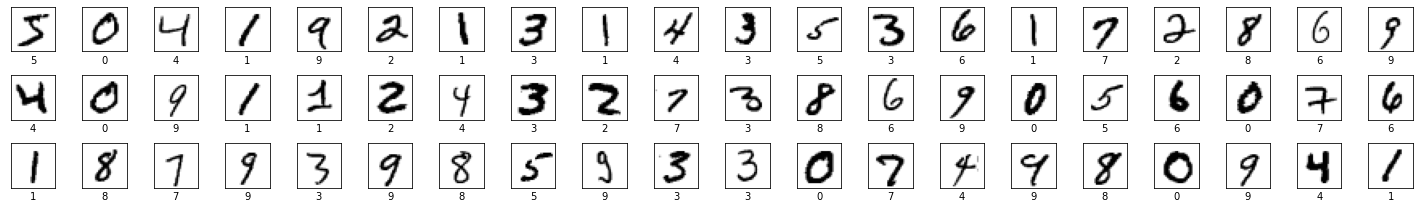

In [34]:
#Visual representation for the dataset
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [35]:
#shape of the image
img_shape = x_train.shape[1:] 
print(img_shape)

(28, 28, 1)


In [36]:
#The actual model.
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=img_shape))
#hidden layer
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48., (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(500, activation='relu')) 
#Output Layer
model.add(Dense(10, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 48)        13872     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)              

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x= model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 0.2514 - accuracy: 0.9223 - val_loss: 0.0593 - val_accuracy: 0.9833
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0842 - accuracy: 0.9738 - val_loss: 0.0437 - val_accuracy: 0.9885
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0605 - accuracy: 0.9809 - val_loss: 0.0412 - val_accuracy: 0.9890
Epoch 4/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.0326 - val_accuracy: 0.9912
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.0294 - val_accuracy: 0.9913
Epoch 6/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0382 - accuracy: 0.9875 - val_loss: 0.0318 - val_accuracy: 0.9915
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0286 - val_accuracy: 0.9917
Epoch 

In [39]:
loss, accuracy = model.evaluate(x_test, y_test) 
print(f'Accuracy : {accuracy*100}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0215 - accuracy: 0.9933
Accuracy : 99.33000206947327


# Accuracy Levels.
# Adam
* Without Data Normalizing: 98.62% 
* With Data normalizing: 99.1% 
# SGD
* Without Data Normalizing: 90.4%.
* With Data normalizing: 97.03%
# RMSProp
* Without Data Normalizing: 98.97%
* With Data normalizing: 99.19%

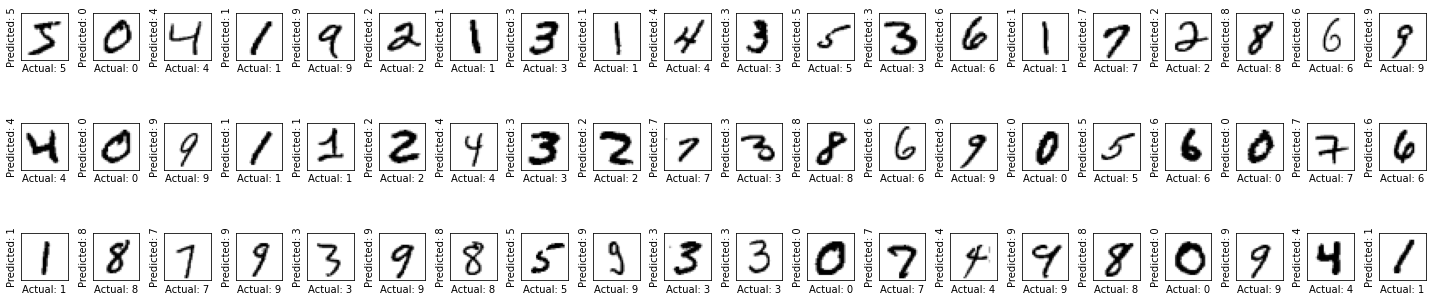

In [40]:
#Mass Output with not good visibility.
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
    
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        image = x_train[i]
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        image= image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
        p = model.predict([image])
        plt.xlabel('Actual: {}'.format(y_train[i]))
        plt.ylabel('Predicted: {}'.format(argmax(p)))
        i += 1
plt.tight_layout()
plt.show() 

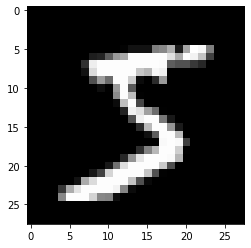

Predicted: 5


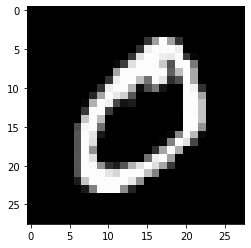

Predicted: 0


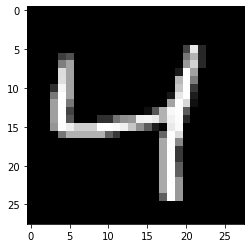

Predicted: 4


In [41]:
#Better OutPut Single Wise Limited to 3 only
for i in range (3):
    image = x_train[i]
    plt.imshow(np.squeeze(image), cmap='gray') 
    plt.show()
    image= image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
    p = model.predict([image])
    print('Predicted: {}'.format(argmax(p)))

# With and without Data Normalization and it's effect.
# Adam
There is no significant improvement over not normalizing the data and opposing to normalizing the data in this case.Before 98.62% accuracy was achieved after normalizing the data we got 99.1% of accuracy which is not a substancial ammount of increment but it certainly helps increasing the accuracy odds. With larger data set the improvement might be significant and it might speed up the process too but for this scenario it wasn't that much.
# SGD
So in sgd normalizign the data affects is substantial. With data normalization we got 97.03% and without we got 90.4%. Which clearly shows that data normalization for this loss function is almost a neccessity because it greatly impacts the prediction results.
# RMSProp
Like adam rmsprop doesn't affect that much with data normalization. Without data normalization we got 98.97%, with data normalization we got 99.19%. Which is not a substantial improvement for this loss function.